In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
df = pd.read_csv('House-Price-Classification.csv')

In [2]:
df.head()

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
0,24.0,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347,0
1,21.6,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146,1
2,34.7,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764,0
3,33.4,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151,0
4,36.2,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474,0


In [3]:
df.describe()

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454,0.454545
std,9.182176,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,5.238957,12.513697,0.010632,0.498422
min,5.000000,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292,0.000000
25%,17.025000,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464,0.000000
50%,21.200000,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507,0.000000
75%,25.000000,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397,1.000000
max,50.000000,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
price          506 non-null float64
resid_area     506 non-null float64
air_qual       506 non-null float64
room_num       506 non-null float64
age            506 non-null float64
dist1          506 non-null float64
dist2          506 non-null float64
dist3          506 non-null float64
dist4          506 non-null float64
teachers       506 non-null float64
poor_prop      506 non-null float64
airport        506 non-null object
n_hos_beds     498 non-null float64
n_hot_rooms    506 non-null float64
waterbody      506 non-null object
rainfall       506 non-null int64
bus_ter        506 non-null object
parks          506 non-null float64
Sold           506 non-null int64
dtypes: float64(14), int64(2), object(3)
memory usage: 75.2+ KB


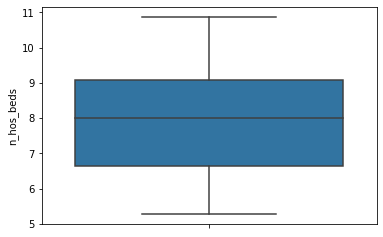

In [5]:
sns.boxplot(y="n_hos_beds", data=df)

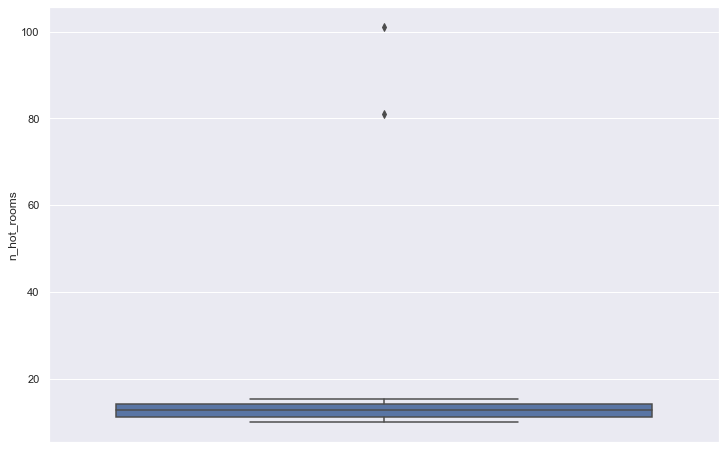

In [6]:
sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(y = "n_hot_rooms", data = df)

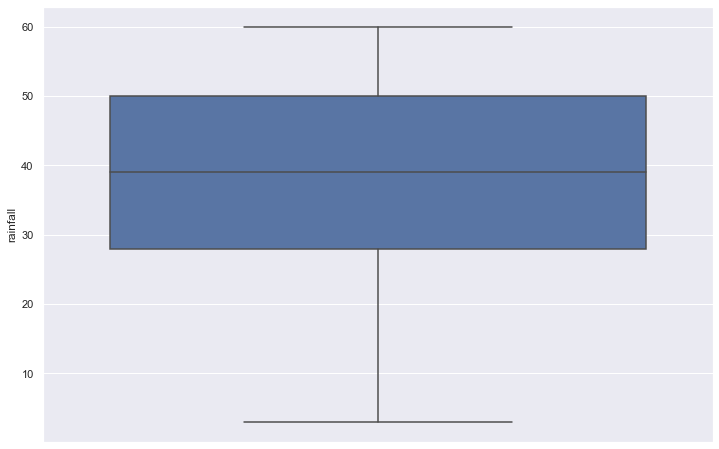

In [7]:
sns.set(rc={'figure.figsize':(12,8)}) #to increase graph size
sns.boxplot(y = "rainfall", data = df)

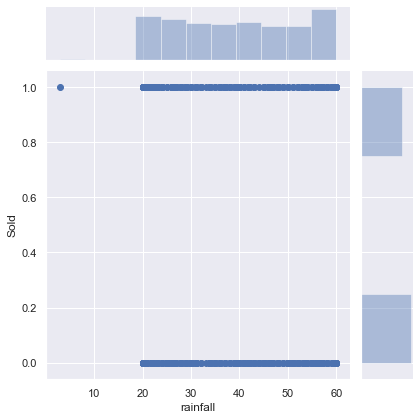

In [8]:
sns.jointplot(x = "rainfall", y="Sold", data = df)

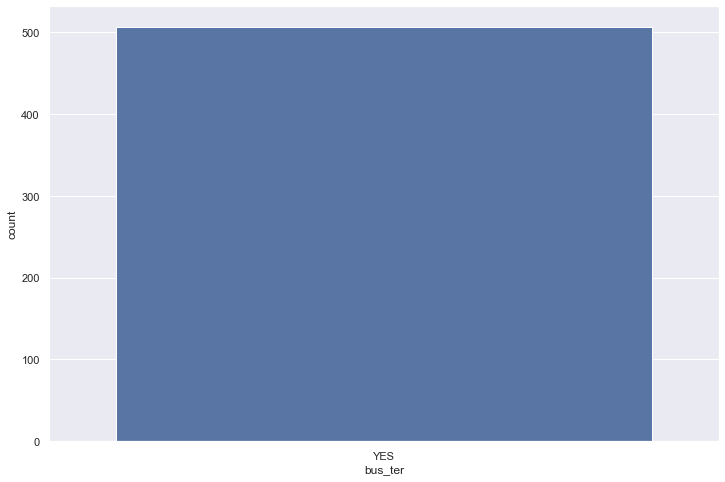

In [9]:
sns.countplot(x = "bus_ter", data = df)

In [10]:
df.n_hos_beds = df.n_hos_beds.fillna(df.n_hos_beds.mean())

In [11]:
uv = np.percentile(df.n_hot_rooms, [99][0])

In [12]:
df.n_hot_rooms[(df.n_hot_rooms > 3 * uv)] = 3 * uv

/Users/rameshveer/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
lv = np.percentile(df.n_hot_rooms, [1] [0])
lv

10.08808

In [14]:
lv = np.percentile(df.rainfall, [1][0])
lv

20.0

In [15]:
df.rainfall[(df.rainfall < 0.7*lv)] = 0.7 * lv

/Users/rameshveer/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
df['avg_dist'] = (df.dist1 + df.dist2 + df.dist3 + df.dist4)/4

In [17]:
del df ['dist1']
del df ['dist2']
del df ['dist3']
del df ['dist4']

In [18]:
del df ['bus_ter']

In [19]:
df = pd.get_dummies(df)

In [20]:
del df ['airport_NO']

In [21]:
del df ['waterbody_None']

In [22]:
df.describe()

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,41.136779,0.554695,6.284634,68.574901,21.544466,12.653063,7.899767,12.864050,39.203557,0.054454,0.454545,3.795104,0.551383,0.191700,0.140316,0.361660
std,9.182176,6.860353,0.115878,0.702617,28.148861,2.164946,7.141062,1.464939,2.688778,12.460157,0.010632,0.498422,2.105859,0.497845,0.394028,0.347659,0.480957
min,5.000000,30.460000,0.385000,3.561000,2.900000,18.000000,1.730000,5.268000,10.057600,14.000000,0.033292,0.000000,1.127500,0.000000,0.000000,0.000000,0.000000
25%,17.025000,35.190000,0.449000,5.885500,45.025000,19.800000,6.950000,6.659000,11.189800,28.000000,0.046464,0.000000,2.100625,0.000000,0.000000,0.000000,0.000000
50%,21.200000,39.690000,0.538000,6.208500,77.500000,20.950000,11.360000,7.963000,12.720000,39.000000,0.053507,0.000000,3.207500,1.000000,0.000000,0.000000,0.000000
75%,25.000000,48.100000,0.624000,6.623500,94.075000,22.600000,16.955000,9.076000,14.170800,50.000000,0.061397,1.000000,5.187500,1.000000,0.000000,0.000000,1.000000
max,50.000000,57.740000,0.871000,8.780000,100.000000,27.400000,37.970000,10.876000,46.198560,60.000000,0.086711,1.000000,12.127500,1.000000,1.000000,1.000000,1.000000


# Simple Logistic Regression

In [23]:
x = df[['price']]
y = df['Sold']

In [24]:
x.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [25]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: Sold, dtype: int64

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
clf_lrs = LogisticRegression()

In [28]:
clf_lrs.fit(x,y)

/Users/rameshveer/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
clf_lrs.coef_

array([[-0.03432813]])

In [30]:
clf_lrs.intercept_

array([0.57938254])

#Using STATSMODEL

In [31]:
import statsmodels.api as sm1

In [32]:
x_cons = sm1.add_constant(x)
x_cons.head()

/Users/rameshveer/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,price
0,1.0,24.0
1,1.0,21.6
2,1.0,34.7
3,1.0,33.4
4,1.0,36.2


In [33]:
import statsmodels.discrete.discrete_model as sm

# logit is a method which uses Max Likelihood method to predict the below summary

In [34]:
logit = sm.Logit(y, x_cons).fit()

Optimization terminated successfully.
         Current function value: 0.676690
         Iterations 5


In [35]:
logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Sold   No. Observations:                  506
Model:                          Logit   Df Residuals:                      504
Method:                           MLE   Df Model:                            1
Date:                Wed, 01 Jan 2020   Pseudo R-squ.:                 0.01788
Time:                        13:43:30   Log-Likelihood:                -342.41
converged:                       True   LL-Null:                       -348.64
Covariance Type:            nonrobust   LLR p-value:                 0.0004142
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6149      0.248      2.484      0.013       0.130       1.100
price         -0.0357      0.010     -3.417      0.001      -0.056      -0.015
==============================================================================
"""

### Multiple Logistic Regression

In [36]:
x = df.loc[:, df.columns != 'Sold']
y = df['Sold']

In [37]:
clf_lr = LogisticRegression()

In [38]:
clf_lr.fit(x,y)

/Users/rameshveer/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
clf_lr.coef_

array([[-0.2516392 , -0.0086621 , -1.19058666,  0.88011949, -0.00472846,
         0.25119176, -0.2119466 ,  0.16639741, -0.08609928, -0.00575029,
        -0.05297174, -0.34114608, -0.12077439, -0.06786056, -0.02258254,
         0.20206474]])

In [40]:
clf_lr.intercept_

array([-0.23416778])

In [41]:
x_cons = sm1.add_constant(x)

/Users/rameshveer/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [42]:
logit = sm.Logit(y, x_cons).fit()

Optimization terminated successfully.
         Current function value: 0.556467
         Iterations 6


In [43]:
logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Sold   No. Observations:                  506
Model:                          Logit   Df Residuals:                      489
Method:                           MLE   Df Model:                           16
Date:                Wed, 01 Jan 2020   Pseudo R-squ.:                  0.1924
Time:                        13:43:30   Log-Likelihood:                -281.57
converged:                       True   LL-Null:                       -348.64
Covariance Type:            nonrobust   LLR p-value:                 1.009e-20
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -2.1482      2.650     -0.811      0.418      -7.341       3.045
price                       -0.2741      0.033     -8.313      0.000      -0.339      -0.209
resid_area                   0.0193      0.027      0.722      0.470      -0.033       0.072
air_qual                    -7.4296      2.692     -2.760      0.006     -12.705      -2.154
room_num                     1.1070      0.277      4.002      0.000       0.565       1.649
age                         -0.0020      0.007     -0.304      0.761      -0.015       0.011
teachers                     0.3150      0.064      4.938      0.000       0.190       0.440
poor_prop                   -0.2077      0.034     -6.149      0.000      -0.274      -0.141
n_hos_beds                   0.1758      0.071      2.465      0.014       0.036       0.316
n_hot_rooms                 -0.0743      0.052     -1.440      0.150      -0.175       0.027
rainfall                    -0.0029      0.008     -0.348      0.728      -0.019       0.014
parks                       29.1451     24.179      1.205      0.228     -18.244      76.535
avg_dist                    -0.4020      0.098     -4.122      0.000      -0.593      -0.211
airport_YES                 -0.1522      0.211     -0.723      0.470      -0.565       0.261
waterbody_Lake              -0.1036      0.304     -0.341      0.733      -0.699       0.491
waterbody_Lake and River    -0.0643      0.328     -0.196      0.844      -0.707       0.578
waterbody_River              0.2392      0.256      0.936      0.349      -0.262       0.740
============================================================================================
"""

#Confusion Matrix

In [44]:
df.head()

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,24.0,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,0.049347,0,4.0875,1,0,0,1
1,21.6,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0.046146,1,4.9675,0,1,0,0
2,34.7,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0.045764,0,4.9675,0,0,0,0
3,33.4,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,0.047151,0,6.0650,1,1,0,0
4,36.2,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0.039474,0,6.0625,0,1,0,0


In [45]:
clf_lr.predict_proba(x)

array([[0.12633769, 0.87366231],
       [0.36961489, 0.63038511],
       [0.97705345, 0.02294655],
       ...,
       [0.28210089, 0.71789911],
       [0.2797238 , 0.7202762 ],
       [0.17278373, 0.82721627]])

In [46]:
y_pred = clf_lr.predict(x)
y_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,

In [47]:
y_pred_03 = (clf_lr.predict_proba(x)[:, 1] >= 0.3)

In [48]:
y_pred_06 = (clf_lr.predict_proba(x)[:, 1] >= 0.55)

In [49]:
y_pred_03

array([ True,  True, False,  True, False, False,  True, False, False,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True, False,  True, False, False,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False,  True,  True,  True,  True,
       False, False, False, False,  True,  True,  True, False,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
       False, False,

In [50]:
from sklearn.metrics import confusion_matrix

In [51]:
confusion_matrix(y, y_pred)

array([[195,  81],
       [ 77, 153]])

In [52]:
confusion_matrix(y, y_pred_06)

array([[214,  62],
       [100, 130]])

### Evaluating Performance of the Logistic Model

In [53]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score

In [54]:
precision_score(y,y_pred)

0.6538461538461539

In [55]:
recall_score(y, y_pred)

0.6652173913043479

In [56]:
roc_auc_score(y, y_pred)

0.6858695652173914

### Linear Discriminant Analysis

In [57]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [58]:
clf_lda = LinearDiscriminantAnalysis()

In [59]:
clf_lda.fit(x, y)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [60]:
y_pred_lda = clf_lda.predict(x)
y_pred_lda

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,

In [61]:
confusion_matrix(y, y_pred_lda)

array([[193,  83],
       [ 79, 151]])

### Test Train Split

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [64]:
print (x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(404, 16) (102, 16) (404,) (102,)


In [65]:
clf_LR = LogisticRegression()
clf_LR.fit(x_train, y_train)

/Users/rameshveer/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
y_test_pred = clf_LR.predict(x_test)

In [67]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [68]:
confusion_matrix(y_test, y_test_pred)

array([[36, 22],
       [13, 31]])

In [69]:
accuracy_score(y_test, y_test_pred)

0.6568627450980392

### k-Nearest Neighbours

In [70]:
#pre-processing becoz kNN needs scaled data
from sklearn import preprocessing

In [71]:
scaler = preprocessing.StandardScaler().fit(x_train)
x_train_s = scaler.transform(x_train)

In [72]:
scaler = preprocessing.StandardScaler().fit(x_test)
x_test_s = scaler.transform(x_test)

In [73]:
x_test_s

array([[ 3.46427198e-02, -1.26009787e+00, -7.59976330e-01, ...,
        -4.93864798e-01, -3.98862018e-01, -7.54473836e-01],
       [ 3.08888478e+00,  1.09537107e+00,  6.84309089e-01, ...,
        -4.93864798e-01, -3.98862018e-01, -7.54473836e-01],
       [ 7.92301952e-02,  4.28041039e-01,  1.73890573e-04, ...,
        -4.93864798e-01, -3.98862018e-01, -7.54473836e-01],
       ...,
       [-4.00085165e-01, -9.60512654e-01, -8.19099125e-01, ...,
        -4.93864798e-01, -3.98862018e-01,  1.32542701e+00],
       [ 6.47720506e-01, -9.50442563e-02, -5.15039037e-01, ...,
        -4.93864798e-01, -3.98862018e-01, -7.54473836e-01],
       [-2.77469608e-01, -4.16820968e-01, -2.53209516e-01, ...,
        -4.93864798e-01,  2.50713268e+00, -7.54473836e-01]])

In [74]:
# Implement K-NN
from sklearn.neighbors import KNeighborsClassifier

In [75]:
clf_knn_l = KNeighborsClassifier(n_neighbors = 1)
clf_knn_l.fit(x_train_s, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [76]:
confusion_matrix(y_test, clf_knn_l.predict(x_test_s))
accuracy_score(y_test, clf_knn_l.predict(x_test_s))

0.5294117647058824

In [77]:
clf_knn_3 = KNeighborsClassifier(n_neighbors = 3)
clf_knn_3.fit(x_train_s, y_train)
accuracy_score(y_test, clf_knn_3.predict(x_test_s))

0.5294117647058824

# Grid search to find best k-value

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
params = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10]}

In [80]:
grid_search_cv = GridSearchCV(KNeighborsClassifier(), params)

In [81]:
grid_search_cv.fit(x_train_s, y_train)

/Users/rameshveer/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/rameshveer/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [82]:
grid_search_cv.best_params_

{'n_neighbors': 7}

In [83]:
optimised_KNN = grid_search_cv.best_estimator_

In [84]:
y_test_pred = optimised_KNN.predict(x_test_s)

In [85]:
confusion_matrix(y_test, y_test_pred)

array([[37, 21],
       [22, 22]])

In [86]:
accuracy_score(y_test, y_test_pred)

0.5784313725490197

In [87]:
from sklearn.metrics import f1_score

In [102]:
f1_score(y_test, y_test_pred, average=None)

array([0.63247863, 0.50574713])

In [90]:
def bestThresshold(y,y_pred):
    best_thresh = None
    best_score = 0
    for thresh in np.arange(0.1, 0.501, 0.01):
        score = f1_score(y, np.array(y_pred)>thresh) 
        if score > best_score:
            best_thresh = thresh
            best_score = score 
    return best_score , best_thresh

In [93]:
beta = bestThresshold(y,y_pred)
beta

(0.6594827586206896, 0.1)

In [94]:
from sklearn.metrics import fbeta_score

In [101]:
fbeta_score(y, y_pred, beta = 0.1)

0.6539568345323741

In [103]:
from sklearn.metrics import log_loss

In [105]:
log_loss(y_test, y_test_pred, eps = 1e-15)

14.560629181639149